# Data for Assignment 5 


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

from data_utils import plot_decision_boundary, load_moons
from NeuralNetwork import DeepNeuralNetwork

%matplotlib inline

## 1. Load data set

Make two interleaving half circles (using scikit-learn).

A simple dataset to visualize classification algorithms.

(2, 200) (1, 200)


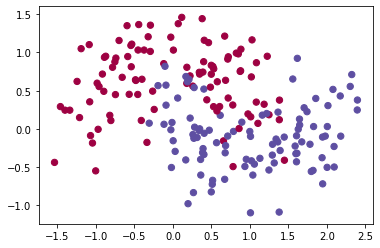

In [15]:
train_X, train_Y = load_moons()
print(train_X.shape, train_Y.shape)

### Logistic regression 

In [16]:
# Class LogisticRegressionCV implements a logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();

# Returns 1-d array of shape (m,) 
C = np.ravel(train_Y)

# Fit the model given the training data
clf.fit(train_X.T, C.T)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

### Predict labels using the logistic regression classifier

In [17]:
# Print accuracy
# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(train_X.T)
print(LR_predictions.shape)
print ('Accuracy of logistic regression: %d ' % float((np.dot(train_Y,LR_predictions) + np.dot(1-train_Y,1-LR_predictions))/float(train_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

(200,)
Accuracy of logistic regression: 84 % (percentage of correctly labelled datapoints)


### Plot decision boundary

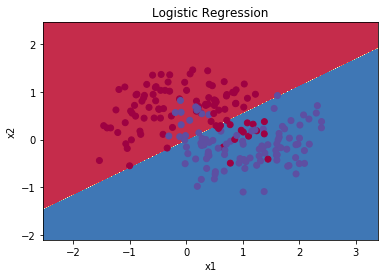

In [18]:
# Plot the decision boundary for logistic regression
plt.title("Logistic Regression")
plot_decision_boundary(lambda x: clf.predict(x), train_X, C)

(2, 200) (1, 200)
(200,)
Test accuracy of logistic regression: 82 % (percentage of correctly labelled datapoints)


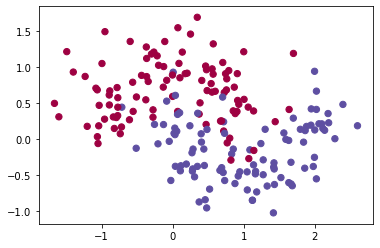

In [19]:
# Print accuracy on a test set generated using the same distribution
test_X, test_Y = load_moons()
print(test_X.shape, test_Y.shape)
# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(test_X.T)
print(LR_predictions.shape)
print ('Test accuracy of logistic regression: %d ' % float((np.dot(test_Y,LR_predictions) + np.dot(1-test_Y,1-LR_predictions))/float(test_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

### Discussion of the Logistic regression
As evident from the training and test accuracies and the decision boundary of the model, we can see that the model underfits the data, leading to only 85% (depends on the data) training accuracy. Althought the test and training performance are similar, thus low generalization gap, the model is underfitting and is not performing the best classification. 

## 2. Discussion on plotting the decision boundary

The function for plotting the decision function takes as arguments an anonymous function 
used to generate the predicted labels, and applies the function to the training data.

plot_decision_boundary(lambda x: clf.predict(x), train_X, C)

The function calls the predict method from the class
LogisticRegressionCV that implements logistic regression in scikit-learn.

---------------------------------------------------------------

predict(X)[source]
Predict class labels for samples in X.

Parameters:	
X : {array-like, sparse matrix}, shape = [n_samples, n_features]

Samples.

Returns:	
C : array, shape = [n_samples]

Predicted class label per sample.

---------------------------------------------------------------

In order to use the same function for plotting the decision boundary
for your neural network model, you need a function for predicting the labels.
Because of the matrix dimensions, you need a separate function that takes as input
the training examples using a matrix of shape (m,n) and outputs the labels
as a 1-d array.

For example, you can implement a function:

predict_plot(parameters,X) 

where paramaters are the weights and biases of the neural network model and 
X is the training data size of shape (m,n).

Then, you can plot the boundary using 

plot_decision_boundary(lambda x: predict_plot(parameters, x), train_X, C)


## Unregularized Network

Used the Neural Network class DeepNeuralNetwork written for Assignment 4 to design and train a 3 layer neural network to perform Binary Classification task on the generated data points. The designed neural network has 2 hidden layers (20 neurons and 10 neurons per layer respectively) with ReLU as the activation function. The output layer has 1 neuron and sigmoid as the activation function.

Other Hyperparameters selected for the neural network are:
learning rate (a) = 0.3
Number of iterations of the gradient descent = 50,000


Not In drop


C:\Users\shrey\OneDrive\Desktop\Deep Learning\Assignment 5\NeuralNetwork.py:229: RuntimeWarning: divide by zero encountered in log
  cost = - np.nansum(y*np.log(A) + (1-y)*np.log(1 - A)) / y.shape[1]
C:\Users\shrey\OneDrive\Desktop\Deep Learning\Assignment 5\NeuralNetwork.py:229: RuntimeWarning: invalid value encountered in multiply
  cost = - np.nansum(y*np.log(A) + (1-y)*np.log(1 - A)) / y.shape[1]


Cost after Training =  0.015971106653823966
Accuracy on Training Data =  0.99


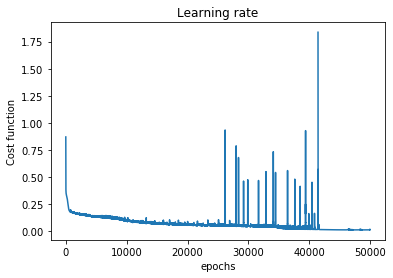

In [20]:
a = 0.3
l = 3
n = [20, 10, 1]
act = ['ReLU', 'ReLU', 'sigmoid']
DNN = DeepNeuralNetwork(train_X, train_Y, test_X, test_Y, alpha = a, layers = l, neurons = n, activations = act)
W, b, pred = DNN.train_model(50000)


In [21]:
print ('Accuracy of Neural Network: %d ' % float((np.dot(train_Y,pred.T) + np.dot(1-train_Y,1-pred.T))/float(train_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of Neural Network: 98 % (percentage of correctly labelled datapoints)


In [22]:
pred = DNN.test_model(test_X)

In [23]:
print ('Test accuracy of Neural Network: %d ' % float((np.dot(test_Y,pred.T) + np.dot(1-test_Y,1-pred.T))/float(test_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Test accuracy of Neural Network: 88 % (percentage of correctly labelled datapoints)


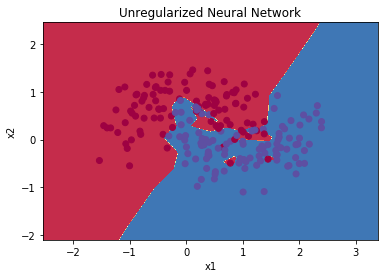

In [24]:
# Plot the decision boundary for logistic regression
plt.title("Unregularized Neural Network")
plot_decision_boundary(lambda x: DNN.test_model(x.T), train_X, C)

### Discussion of results for Unregularized Neural Network
As expected the neural network achieves 100% accuracy on the training data, since we have only 200 data points and thus results in high degree of overfitting on the training data. This is evident from the performance of the model on the test data. The model achieves 93% accuracy on the test data, considerably lower than the training data performance and thus a big generalization gap.

Althought the perfomance of the model is much better than the logistic regression which underfits the data. But the model goes in the other extreme and overfits the training data. As is evident from the red islands in the regions dominated by the blue points due to presence of 2 red points

The overfitting of the model can be observed by plotting the decision boundary of the model. As expected the decision boundary is spicky and not smooth as the model tries to fit all the training data. Consequently, the performance of the model on the unseen test data is underwhelming.

## L2 Regularized Network

In this section, I have implemented L2 regularization in the neural network class to reduce the degree of overfitting. The model designed is exactly similar in architecture as the previous model, with L2 regularization as the only modification. The designed neural network has 2 hidden layers (20 neurons and 10 neurons per layer respectively) with ReLU as the activation function. The output layer has 1 neuron and sigmoid as the activation function.

Other Hyperparameters selected for the neural network are:
learning rate (a) = 0.3
Number of iterations of the gradient descent = 50,000

To investigate the impact of the regularization hyperparameter, I have trained and analyzed multiple neural networks (same architecture) with different values for regularization parameter. The values investigated are: 0, 0.1, 0.3, 0.5, 0.7, 1

The training and test accuracies and the decision boundaries for the various models are shown and discussed below:

For Lambda =  0
Not In drop
Cost after Training =  0.03214785683739584
Accuracy on Training Data =  0.99
Accuracy of Neural Network: 97 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 86 % (percentage of correctly labelled datapoints)


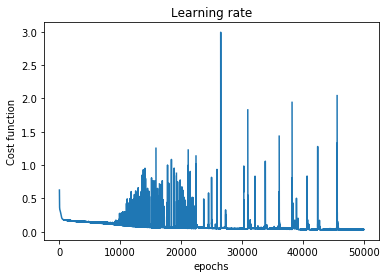

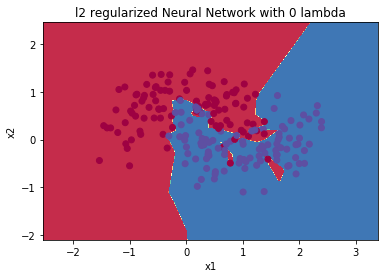

For Lambda =  0.1
Not In drop
Cost after Training =  0.1574707817732335
Accuracy on Training Data =  0.94
Accuracy of Neural Network: 91 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 89 % (percentage of correctly labelled datapoints)


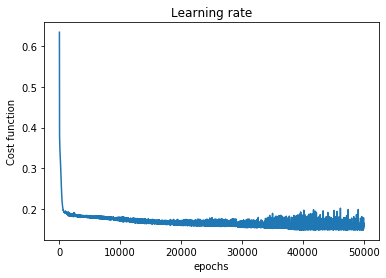

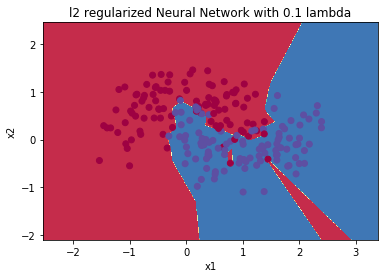

For Lambda =  0.3
Not In drop
Cost after Training =  0.20515695057675665
Accuracy on Training Data =  0.92
Accuracy of Neural Network: 88 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 90 % (percentage of correctly labelled datapoints)


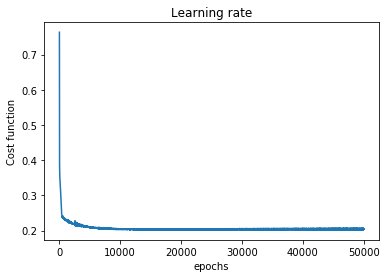

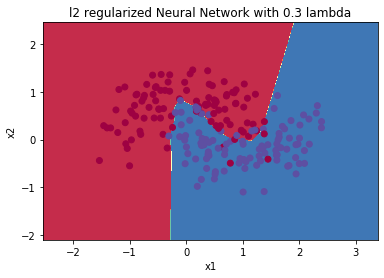

For Lambda =  0.5
Not In drop
Cost after Training =  0.22892430211001244
Accuracy on Training Data =  0.915
Accuracy of Neural Network: 87 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 90 % (percentage of correctly labelled datapoints)


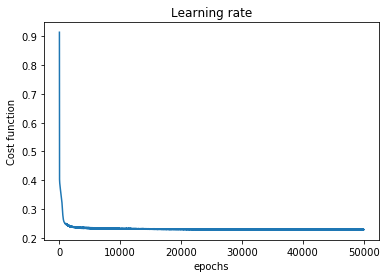

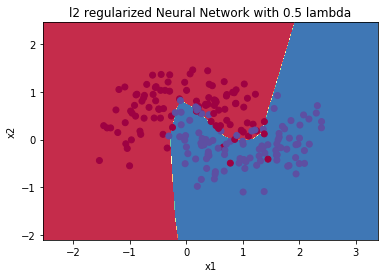

For Lambda =  0.7
Not In drop
Cost after Training =  0.24477686289556758
Accuracy on Training Data =  0.91
Accuracy of Neural Network: 87 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 90 % (percentage of correctly labelled datapoints)


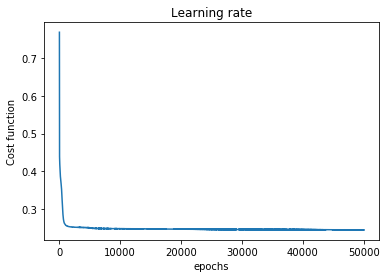

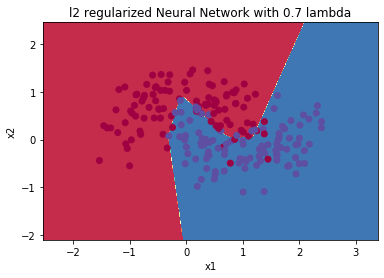

For Lambda =  1
Not In drop
Cost after Training =  0.27007538629892036
Accuracy on Training Data =  0.89
Accuracy of Neural Network: 86 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 91 % (percentage of correctly labelled datapoints)


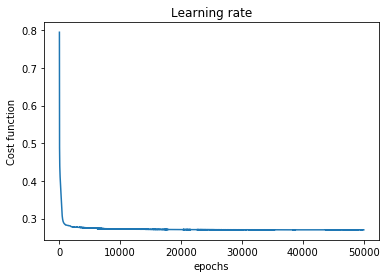

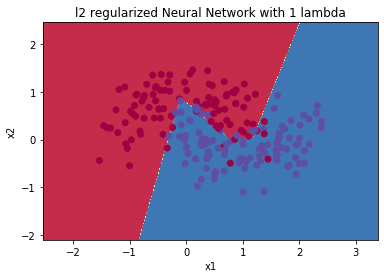

In [25]:
# lmbda = 0.5
Lmbda = [0, 0.1, 0.3, 0.5, 0.7, 1]
for lmbda in Lmbda:
    print('For Lambda = ', lmbda)
    l2_DNN = DeepNeuralNetwork(train_X, train_Y, test_X, test_Y, alpha = a, layers = l, neurons = n, activations = act, reg = True, lmbda = lmbda)
    _, _, pred_l2 = l2_DNN.train_model(50000)
    print ('Accuracy of Neural Network: %d ' % float((np.dot(train_Y,pred_l2.T) + np.dot(1-train_Y,1-pred_l2.T))/float(train_Y.size)*100) +
           '% ' + "(percentage of correctly labelled datapoints)")

    pred_l2_t = l2_DNN.test_model(test_X)
    print ('Test accuracy of Neural Network: %d ' % float((np.dot(test_Y,pred_l2_t.T) + np.dot(1-test_Y,1-pred_l2_t.T))/float(test_Y.size)*100) +
           '% ' + "(percentage of correctly labelled datapoints)")
    # Plot the decision boundary for logistic regression
    plt.figure()
    plt.title("l2 regularized Neural Network with {} lambda".format(lmbda))
    plot_decision_boundary(lambda x: l2_DNN.test_model(x.T), train_X, C)
    plt.show()

### Discussion of L2 regularization 
As expected, increasing the value of the regularization hyperparameter, decreases the overfitting of the model. The performance of the model with regularization parameter = 0 is similar to the unregularzied model, resulting in a huge generalization gap and spicky decision boundary. But as the value of the regularization parameter is increased, although training accuracy decreases but the test accuracy increases and the decision boundary becomes smooth, thus leading to reduced overfitting.

But increasing the regularization parameter too much results in decrease in the model performance for both training and test data as this leads to underfitting of the model.

After observing the effect of the various regularization parameter, it is evident that the value of 0.5 on this dataset gives a good performance on both the training and test data.

## Dropout Regularized Network

In this section, I have implemented Dropout regularization in the neural network class to reduce the degree of overfitting. The model designed is exactly similar in architecture as the previous model, with Dropout as the only modification. The designed neural network has 2 hidden layers (20 neurons and 10 neurons per layer respectively) with ReLU as the activation function. The output layer has 1 neuron and sigmoid as the activation function.

Other Hyperparameters selected for the neural network are:
learning rate (a) = 0.3
Number of iterations of the gradient descent = 50,000

To investigate the impact of the keep probability hyperparameter, I have trained and analyzed multiple neural networks (same architecture) with different values of keep probability. The values investigated are: 0.1, 0.3, 0.5, 0.7, 0.9, 1

The training and test accuracies and the decision boundaries for the various models are shown and discussed below:

For Keep Probability =  0.1
In drop
Cost after Training =  0.5249225633677428
Accuracy on Training Data =  0.78
Accuracy of Neural Network: 60 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 73 % (percentage of correctly labelled datapoints)


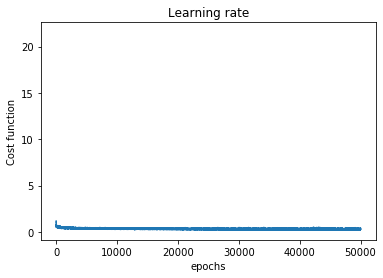

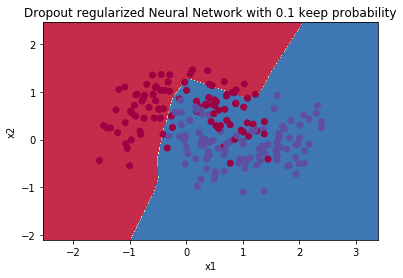

For Keep Probability =  0.3
In drop
Cost after Training =  0.2607568416574672
Accuracy on Training Data =  0.92
Accuracy of Neural Network: 79 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 90 % (percentage of correctly labelled datapoints)


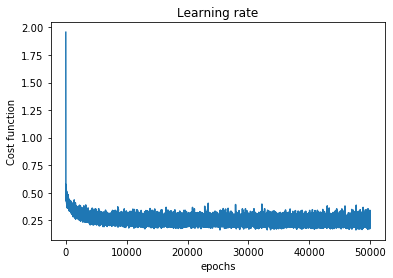

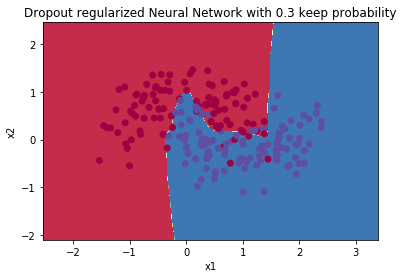

For Keep Probability =  0.5
In drop
Cost after Training =  0.15027485686282752
Accuracy on Training Data =  0.94
Accuracy of Neural Network: 88 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 89 % (percentage of correctly labelled datapoints)


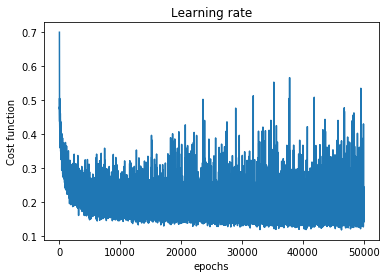

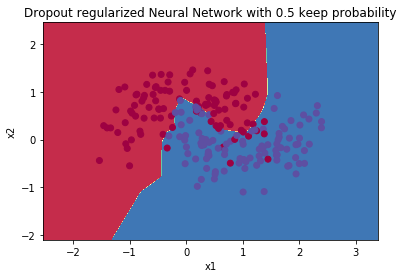

For Keep Probability =  0.7
In drop
Cost after Training =  0.12500863062236756
Accuracy on Training Data =  0.945
Accuracy of Neural Network: 90 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 89 % (percentage of correctly labelled datapoints)


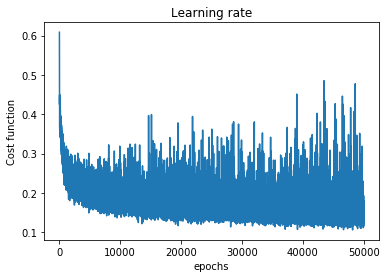

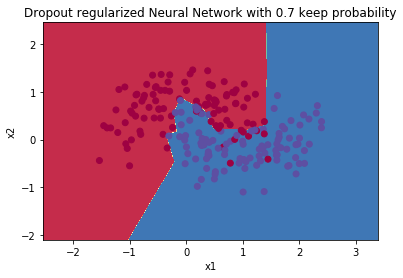

For Keep Probability =  0.9
In drop
Cost after Training =  0.11236148259746147
Accuracy on Training Data =  0.935
Accuracy of Neural Network: 92 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 89 % (percentage of correctly labelled datapoints)


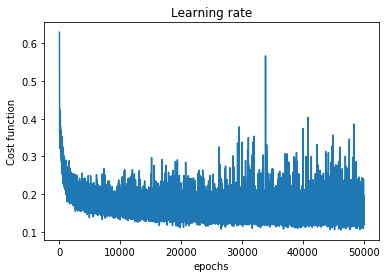

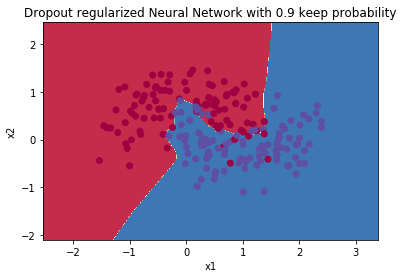

For Keep Probability =  1
In drop
Cost after Training =  0.1091941220500618
Accuracy on Training Data =  0.94
Accuracy of Neural Network: 92 % (percentage of correctly labelled datapoints)
Test accuracy of Neural Network: 89 % (percentage of correctly labelled datapoints)


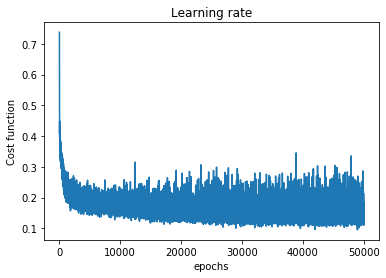

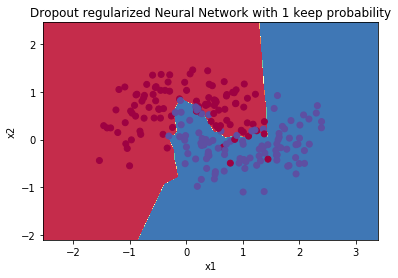

In [26]:
# kp = 0.5
KP = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
for kp in KP:
    print('For Keep Probability = ', kp)
    drop_Dnn = DeepNeuralNetwork(train_X, train_Y, test_X, test_Y, alpha = a, layers = l, neurons = n, activations = act, drop = True, kp = kp)
    _, _, pred_drop = drop_Dnn.train_model(50000)
    print ('Accuracy of Neural Network: %d ' % float((np.dot(train_Y,pred_drop.T) + np.dot(1-train_Y,1-pred_drop.T))/float(train_Y.size)*100) +
           '% ' + "(percentage of correctly labelled datapoints)")

    pred_drop_t = drop_Dnn.test_model(test_X)
    print ('Test accuracy of Neural Network: %d ' % float((np.dot(test_Y,pred_drop_t.T) + np.dot(1-test_Y,1-pred_drop_t.T))/float(test_Y.size)*100) +
           '% ' + "(percentage of correctly labelled datapoints)")
    # Plot the decision boundary for logistic regression
    plt.figure()
    plt.title("Dropout regularized Neural Network with {} keep probability".format(kp))
    plot_decision_boundary(lambda x: drop_Dnn.test_model(x.T), train_X, C)
    plt.show()

### Discussion of Dropout Regularization
As expected with decreasing the value of the keep probability hyperparameter, decreases the overfitting of the model. The performance of the model with Keep probability parameter = 1 is similar to the unregularzied model, resulting in a huge generalization gap and spicky decision boundary. But as the value of the keep probability is decreased (up to a certain value), although training accuracy decreases but the test accuracy increases and the decision boundary becomes smooth, thus leading to reduced overfitting. But after a certain point, reducing the value of the keep probability results in degraded performance of the model on both training and test datasets, leading to underfittin of the model.

After observing the effect of the various keep probability, it is evident that the value of 0.5 on this dataset gives good performance on both the training and test data.